In [ ]:
# Imports
import numpy as np
import cv2
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier("/content/drive/My Drive/haarcascade_frontalface_default.xml")

# Set image dimensions
img_height, img_width = 48, 48  # Consistent with your original code

# Function to load and preprocess dataset
def load_dataset(train_dir, test_dir, class_names):
    def load_images(directory, classes):
        print(directory)
        images = []
        labels = []
        for label, expression in enumerate(classes):
            expression_folder = os.path.join(directory, expression)
            if not os.path.exists(expression_folder):
                print(f"Warning: {expression_folder} does not exist.")
                continue
            for filename in os.listdir(expression_folder):
                img_path = os.path.join(expression_folder, filename)

                img = cv2.imread(img_path)  # Read image
                if img is None:
                    continue
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

                # Detect faces
                faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
                if len(faces) == 0:
                    continue

                x, y, w, h = faces[0]  # Use first detected face
                face_img = gray[y:y+h, x:x+w]  # Crop face (grayscale)
                face_img = cv2.resize(face_img, (64, 64))
                face_img = np.expand_dims(face_img, axis=-1)

                images.append(face_img)
                labels.append(label)

        images = np.array(images, dtype="float32") / 255.0  # Normalize to [0, 1]
        labels = np.array(labels)
        return images, labels

    # Load training and testing data
    X_train, y_train = load_images(train_dir, class_names)
    X_test, y_test = load_images(test_dir, class_names)

    return X_train, y_train, X_test, y_test


Mounted at /content/drive


In [ ]:
# Define dataset paths and class names for JAFFE and FER (6 classes each)
jaffe_train_dir = '/content/drive/My Drive/JAFFE-[70,30]/JAFFE-[70,30]/train'
jaffe_test_dir = '/content/drive/My Drive/JAFFE-[70,30]/JAFFE-[70,30]/test'

fer_train_dir = '/content/drive/My Drive/FER-dataset/train'
fer_test_dir = '/content/drive/My Drive/FER-dataset/test'

jaffe_classes = ['Happy', 'Sad', 'Angry', 'Surprise', 'Fear', 'Neutral']  # 6 classes
fer_classes = ['happy', 'sad', 'angry', 'surprise', 'fear', 'neutral']  # 6 classes, excluding disgust

# Load datasets
X_jaffe_train, y_jaffe_train, X_jaffe_test, y_jaffe_test = load_dataset(jaffe_train_dir, jaffe_test_dir, jaffe_classes)
X_fer_train, y_fer_train, X_fer_test, y_fer_test = load_dataset(fer_train_dir, fer_test_dir, fer_classes)

# Check shapes
print("JAFFE Training data shape:", X_jaffe_train.shape)
print("JAFFE Test data shape:", X_jaffe_test.shape)
print("FER Training data shape:", X_fer_train.shape)
print("FER Test data shape:", X_fer_test.shape)


/content/drive/My Drive/JAFFE-[70,30]/JAFFE-[70,30]/train
/content/drive/My Drive/JAFFE-[70,30]/JAFFE-[70,30]/test
/content/drive/My Drive/FER-dataset/train
/content/drive/My Drive/FER-dataset/test
JAFFE Training data shape: (128, 64, 64, 1)
JAFFE Test data shape: (55, 64, 64, 1)
FER Training data shape: (6553, 64, 64, 1)
FER Test data shape: (1635, 64, 64, 1)



Training JAFFE Model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 410ms/step - accuracy: 0.2197 - loss: 1.8116 - val_accuracy: 0.1636 - val_loss: 1.7999
Epoch 2/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 186ms/step - accuracy: 0.1525 - loss: 1.8030 - val_accuracy: 0.1636 - val_loss: 1.7906
Epoch 3/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.2377 - loss: 1.7881 - val_accuracy: 0.2364 - val_loss: 1.7930
Epoch 4/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.2233 - loss: 1.7793 - val_accuracy: 0.1636 - val_loss: 1.7887
Epoch 5/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.2202 - loss: 1.7839 - val_accuracy: 0.1636 - val_loss: 1.7852
Epoch 6/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.1881 - loss: 1.7813 - val_accuracy: 0.2545 - val_loss: 1.7775
Epoch 7/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - accuracy: 0.2621 - loss: 1.7587 - val_accuracy: 0.2727 - val_loss: 1.7610
Epoch 8/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - accuracy: 0.3261 - loss: 1.7475 - val_accuracy: 0.1636 - val_loss:

JAFFE Test accuracy: 61.82%


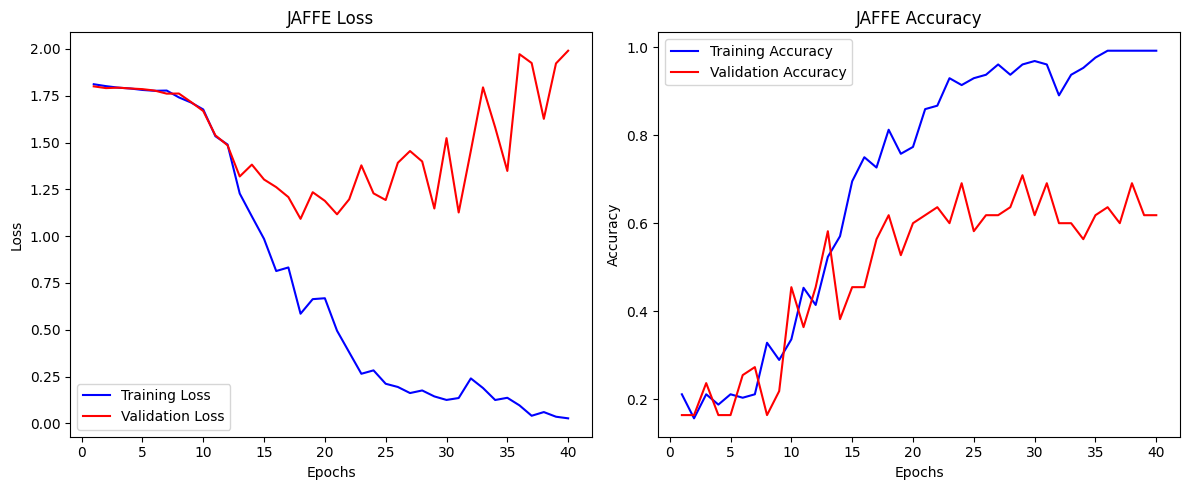

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step

JAFFE Confusion Matrix:
[[1 3 2 0 0 3]
 [0 3 3 0 0 3]
 [0 0 8 0 0 1]
 [0 0 0 6 0 3]
 [0 3 0 0 7 0]
 [0 0 0 0 0 9]]

JAFFE Classification Report:
              precision    recall  f1-score   support

       Happy       1.00      0.11      0.20         9
         Sad       0.33      0.33      0.33         9
       Angry       0.62      0.89      0.73         9
    Surprise       1.00      0.67      0.80         9
        Fear       1.00      0.70      0.82        10
     Neutral       0.47      1.00      0.64         9

    accuracy                           0.62        55
   macro avg       0.74      0.62      0.59        55
weighted avg       0.74      0.62      0.59        55



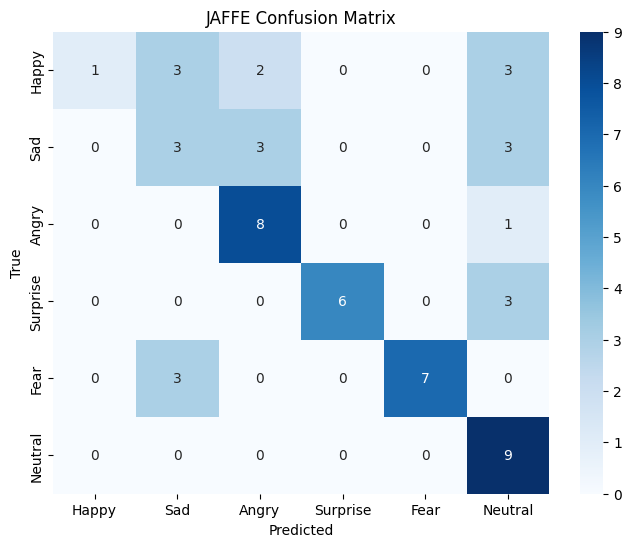


Training FER Model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.3071 - loss: 1.7050 - val_accuracy: 0.3737 - val_loss: 1.6209
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.3979 - loss: 1.5589 - val_accuracy: 0.4599 - val_loss: 1.3713
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 79s 980ms/step - accuracy: 0.4943 - loss: 1.3443 - val_accuracy: 0.5394 - val_loss: 1.2356
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 82s 978ms/step - accuracy: 0.5328 - loss: 1.2429 - val_accuracy: 0.5450 - val_loss: 1.1757
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.5615 - loss: 1.1715 - val_accuracy: 0.5700 - val_loss: 1.1231
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.5934 - loss: 1.0891 - val_accuracy: 0.5670 - val_loss: 1.1303
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.6177 - loss: 1.0287 - val_accuracy: 0.5988 - val_loss: 1.0730
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.6283 - loss: 0.9842 - val_accuracy: 0.5976 - val

FER Test accuracy: 64.89%


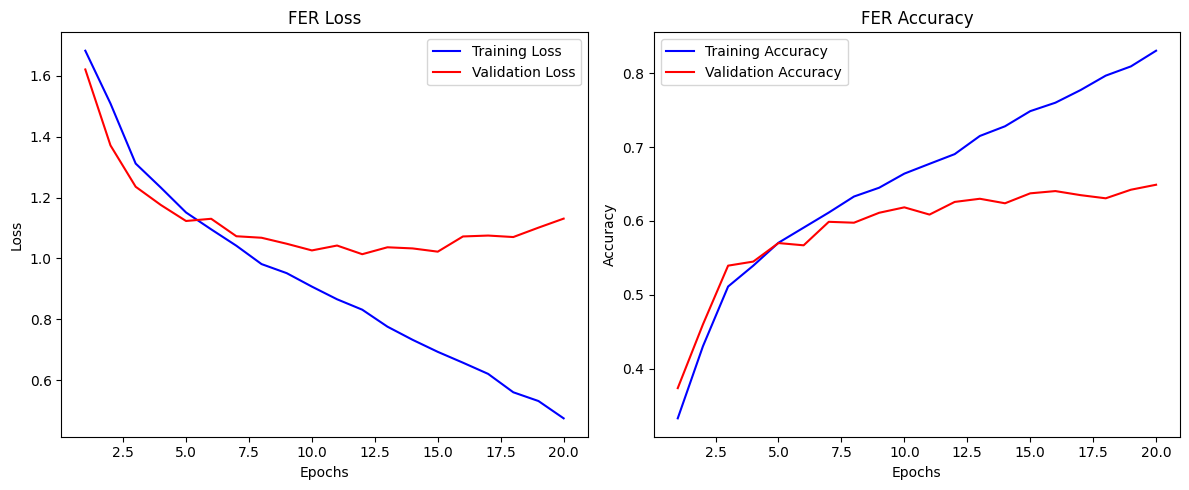

52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step

FER Confusion Matrix:
[[452   8  14  10   6  20]
 [ 14  70  34   1  16  43]
 [ 21  32 126   5  14  27]
 [ 14   6   8 118  19   5]
 [  9  28  33  13  87  19]
 [ 51  46  38  11   9 208]]

FER Classification Report:
              precision    recall  f1-score   support

       happy       0.81      0.89      0.84       510
         sad       0.37      0.39      0.38       178
       angry       0.50      0.56      0.53       225
    surprise       0.75      0.69      0.72       170
        fear       0.58      0.46      0.51       189
     neutral       0.65      0.57      0.61       363

    accuracy                           0.65      1635
   macro avg       0.61      0.59      0.60      1635
weighted avg       0.65      0.65      0.65      1635



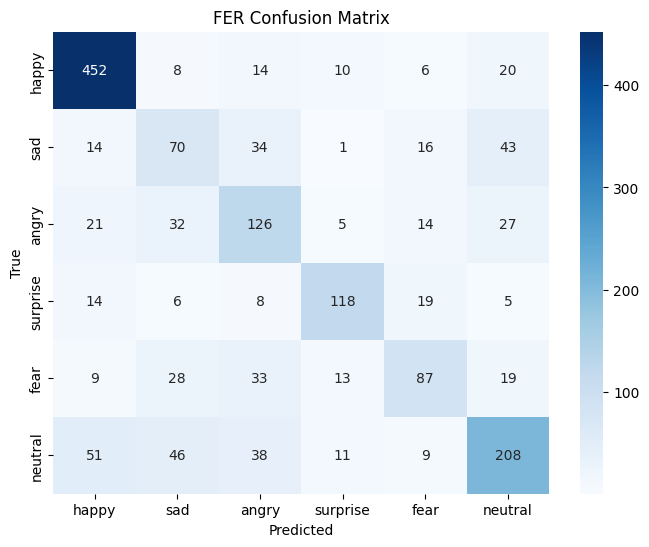

Done! Check your Google Drive for saved models, plots, and matrices.


In [ ]:
# Function to create the CNN model
# Function to create the CNN model with dynamically calculated Dense layer input
def create_cnn_model(num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),  # Adjusted size based on feature map after convolution layers
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')  # Number of classes varies
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


# Function to plot metrics (Loss and Accuracy)
def plot_metrics(history, title_prefix, save_path):
    epochs = range(1, len(history.history['loss']) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], 'b', label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], 'r', label='Validation Loss')
    plt.title(f'{title_prefix} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], 'b', label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'r', label='Validation Accuracy')
    plt.title(f'{title_prefix} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

# Function to evaluate and plot confusion matrix
def evaluate_model(model, X_test, y_test, class_names, title, save_path):
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n{title} Confusion Matrix:")
    print(cm)
    print(f"\n{title} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{title} Confusion Matrix')
    plt.savefig(save_path)
    plt.show()

# Train and evaluate JAFFE model
if X_jaffe_train.size > 0 and X_jaffe_test.size > 0:
    print("\nTraining JAFFE Model...")
    jaffe_model = create_cnn_model(num_classes=len(jaffe_classes))
    jaffe_history = jaffe_model.fit(
        X_jaffe_train, y_jaffe_train,
        epochs=40, batch_size=24,
        validation_data=(X_jaffe_test, y_jaffe_test)
    )
    loss, accuracy = jaffe_model.evaluate(X_jaffe_test, y_jaffe_test)
    print(f"JAFFE Test accuracy: {accuracy*100:.2f}%")
    jaffe_model.save('/content/drive/My Drive/jaffe_face_expression_model2.h5')
    plot_metrics(jaffe_history, "JAFFE", '/content/drive/My Drive/jaffe_accuracy_loss_plot2.png')
    evaluate_model(jaffe_model, X_jaffe_test, y_jaffe_test, jaffe_classes, "JAFFE", '/content/drive/My Drive/jaffe_confusion_matrix2.png')
else:
    print("ERROR: JAFFE dataset loading failed.")

# Train and evaluate FER model
if X_fer_train.size > 0 and X_fer_test.size > 0:
    print("\nTraining FER Model...")
    fer_model = create_cnn_model(num_classes=len(fer_classes))
    fer_history = fer_model.fit(
        X_fer_train, y_fer_train,
        epochs=20, batch_size=128,  # Larger batch size and fewer epochs for FER due to larger dataset
        validation_data=(X_fer_test, y_fer_test)
    )
    loss, accuracy = fer_model.evaluate(X_fer_test, y_fer_test)
    print(f"FER Test accuracy: {accuracy*100:.2f}%")
    fer_model.save('/content/drive/My Drive/fer_face_expression_model2.h5')
    plot_metrics(fer_history, "FER", '/content/drive/My Drive/fer_accuracy_loss_plot2.png')
    evaluate_model(fer_model, X_fer_test, y_fer_test, fer_classes, "FER", '/content/drive/My Drive/fer_confusion_matrix2.png')
else:
    print("ERROR: FER dataset loading failed.")

print("Done! Check your Google Drive for saved models, plots, and matrices.")


JAFFE Model Prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


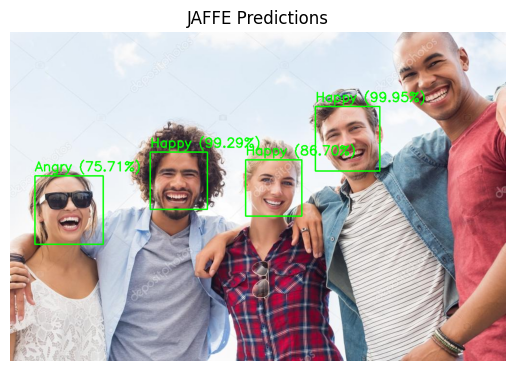

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


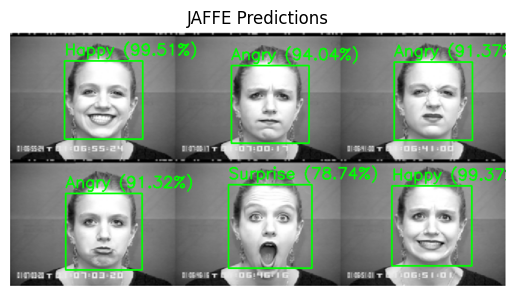


FER Model Prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


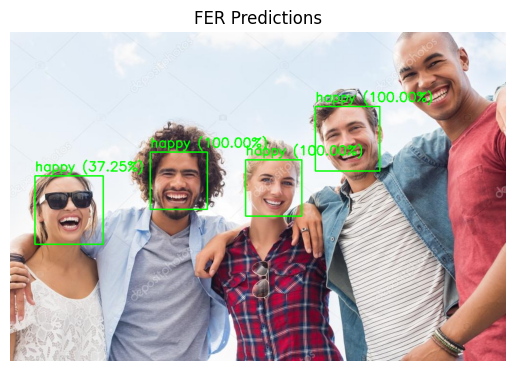

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


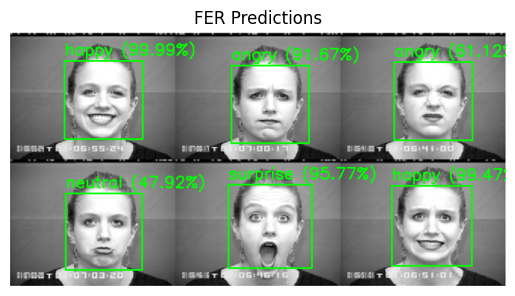

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load pre-trained models
jaffe_model_path = '/content/drive/My Drive/jaffe_face_expression_model2.h5'
fer_model_path = '/content/drive/My Drive/fer_face_expression_model2.h5'

jaffe_model = load_model(jaffe_model_path)
fer_model = load_model(fer_model_path)

# Class names
jaffe_classes = ['Happy', 'Sad', 'Angry', 'Surprise', 'Fear', 'Neutral']
fer_classes = ['happy', 'sad', 'angry', 'surprise', 'fear', 'neutral']

# Load OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to preprocess image
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Unable to load image {img_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    if len(faces) == 0:
        print("No faces detected in image.")
        return None

    face_imgs = []
    original_faces = []
    face_coords = []

    for (x, y, w, h) in faces:
        face_img = gray[y:y+h, x:x+w]
        face_img = cv2.resize(face_img, (64, 64))
        face_img = np.expand_dims(face_img, axis=-1)  # Add channel dimension
        face_img = np.expand_dims(face_img, axis=0)  # Add batch dimension
        face_img = face_img.astype('float32') / 255.0  # Normalize
        face_imgs.append(face_img)
        original_faces.append((x, y, w, h))
        face_coords.append((x, y, w, h))

    return face_imgs, img, original_faces, face_coords

# Function to predict emotion
def predict_emotion(img_path, model, class_names, model_name):
    preprocessed_data = preprocess_image(img_path)
    if preprocessed_data is None:
        return
    face_imgs, orig_img, original_faces, face_coords = preprocessed_data

    # Loop through each face and predict the emotion
    for i, face_img in enumerate(face_imgs):
        # Predict emotion
        prediction = model.predict(face_img)
        predicted_class = np.argmax(prediction)
        emotion = class_names[predicted_class]
        confidence = np.max(prediction) * 100

        # Draw rectangle around the face and label it
        (x, y, w, h) = face_coords[i]
        cv2.rectangle(orig_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(orig_img, f"{emotion} ({confidence:.2f}%)", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display image with predictions
    plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
    plt.title(f"{model_name} Predictions")
    plt.axis('off')
    plt.show()

# Example usage
image_path_1 = '/content/drive/My Drive/FER-testingimages/faces-2.jpg'
image_path_3 = '/content/drive/My Drive/FER-testingimages/test.png'
print("JAFFE Model Prediction:")
predict_emotion(image_path_1, jaffe_model, jaffe_classes, "JAFFE")
predict_emotion(image_path_3, jaffe_model, jaffe_classes, "JAFFE")
print("\nFER Model Prediction:")
predict_emotion(image_path_1, fer_model, fer_classes, "FER")
predict_emotion(image_path_3, fer_model, fer_classes, "FER")

